In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import configparser

config = configparser.ConfigParser()
config.read('config.ini')

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.max_colwidth=None

Path

In [2]:
RAW_PATH = config['paths']['raw_data']
INTERIM_PATH = config['paths']['interim_data']
PROCESSED_PATH = config['paths']['processed_data']

Interim Data

In [3]:
data_calls_reservations = pd.read_csv(f'{INTERIM_PATH}\data_calls_reservation.csv', delimiter=";")
print(data_calls_reservations.info())

data_calls_reservations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          1155 non-null   object 
 1   calls                         1155 non-null   int64  
 2   weekday                       1155 non-null   int64  
 3   month_day                     1155 non-null   object 
 4   month_year                    1155 non-null   object 
 5   reservations_2months_advance  790 non-null    float64
 6   total_reservations            790 non-null    float64
 7   summer_break                  1155 non-null   float64
 8   christmas_break               1155 non-null   float64
 9   special_day                   1155 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 90.4+ KB
None


,date,calls,weekday,month_day,month_year,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,2013-01-01,2429,2,01-01,2013-01,NaN,NaN,0.0,1.0,1.0
1,2013-01-02,3881,3,01-02,2013-01,NaN,NaN,0.0,1.0,0.0
2,2013-01-03,3560,4,01-03,2013-01,NaN,NaN,0.0,0.0,0.0
3,2013-01-04,3155,5,01-04,2013-01,NaN,NaN,0.0,0.0,0.0
4,2013-01-05,1538,6,01-05,2013-01,NaN,NaN,0.0,0.0,0.0


In [4]:
data_calls_reservations['date'] = pd.to_datetime(data_calls_reservations['date'].str.strip(), format='%Y-%m-%d')

data_calls_reservations['year'] = data_calls_reservations['date'].dt.year
data_calls_reservations['day_of_year'] = data_calls_reservations['date'].dt.dayofyear
data_calls_reservations['week_of_year'] = data_calls_reservations['date'].dt.isocalendar().week
data_calls_reservations['quarter'] = data_calls_reservations['date'].dt.quarter
data_calls_reservations['month'] = data_calls_reservations['date'].dt.month
data_calls_reservations['day_of_month'] = data_calls_reservations['date'].dt.day

# using prior target as feature
data_calls_reservations['calls_lag'] = data_calls_reservations['calls'].shift(1)

data_calls_reservations.head()

,date,calls,weekday,month_day,month_year,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,year,day_of_year,week_of_year,quarter,month,day_of_month,calls_lag
0,2013-01-01,2429,2,01-01,2013-01,NaN,NaN,0.0,1.0,1.0,2013,1,1,1,1,1,NaN
1,2013-01-02,3881,3,01-02,2013-01,NaN,NaN,0.0,1.0,0.0,2013,2,1,1,1,2,2429.0
2,2013-01-03,3560,4,01-03,2013-01,NaN,NaN,0.0,0.0,0.0,2013,3,1,1,1,3,3881.0
3,2013-01-04,3155,5,01-04,2013-01,NaN,NaN,0.0,0.0,0.0,2013,4,1,1,1,4,3560.0
4,2013-01-05,1538,6,01-05,2013-01,NaN,NaN,0.0,0.0,0.0,2013,5,1,1,1,5,3155.0


In [5]:
# new 'break' column based on summer, christmas, special - since individual columns have lower data points
data_calls_reservations['break'] = data_calls_reservations['summer_break'] + data_calls_reservations['christmas_break'] + data_calls_reservations['special_day']
data_calls_reservations['break'].value_counts(dropna=False)

break
0.0    895
1.0    247
2.0     13
Name: count, dtype: int64

In [6]:
data_calls_reservations.columns

Index(['date', 'calls', 'weekday', 'month_day', 'month_year',
       'reservations_2months_advance', 'total_reservations', 'summer_break',
       'christmas_break', 'special_day', 'year', 'day_of_year', 'week_of_year',
       'quarter', 'month', 'day_of_month', 'calls_lag', 'break'],
      dtype='object')

In [7]:
# drop unwanted columns
data_calls_reservations_01 = data_calls_reservations.copy()
del data_calls_reservations

data_calls_reservations_01 = data_calls_reservations_01[['date', 'year', 'day_of_year', 'week_of_year', 'quarter', 'month', 'day_of_month', 'weekday', 'calls_lag', 'reservations_2months_advance', 'total_reservations', 'summer_break', 'christmas_break', 'special_day', 'break', 'calls']]
data_calls_reservations_01.head()

,date,year,day_of_year,week_of_year,quarter,month,day_of_month,weekday,calls_lag,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,break,calls
0,2013-01-01,2013,1,1,1,1,1,2,NaN,NaN,NaN,0.0,1.0,1.0,2.0,2429
1,2013-01-02,2013,2,1,1,1,2,3,2429.0,NaN,NaN,0.0,1.0,0.0,1.0,3881
2,2013-01-03,2013,3,1,1,1,3,4,3881.0,NaN,NaN,0.0,0.0,0.0,0.0,3560
3,2013-01-04,2013,4,1,1,1,4,5,3560.0,NaN,NaN,0.0,0.0,0.0,0.0,3155
4,2013-01-05,2013,5,1,1,1,5,6,3155.0,NaN,NaN,0.0,0.0,0.0,0.0,1538


In [8]:
data_calls_reservations_02 = data_calls_reservations_01.copy()
# data_calls_reservations_01.drop(['reservations_2months_advance', 'total_reservations'], axis=1)
data_calls_reservations_02.head()

,date,year,day_of_year,week_of_year,quarter,month,day_of_month,weekday,calls_lag,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,break,calls
0,2013-01-01,2013,1,1,1,1,1,2,NaN,NaN,NaN,0.0,1.0,1.0,2.0,2429
1,2013-01-02,2013,2,1,1,1,2,3,2429.0,NaN,NaN,0.0,1.0,0.0,1.0,3881
2,2013-01-03,2013,3,1,1,1,3,4,3881.0,NaN,NaN,0.0,0.0,0.0,0.0,3560
3,2013-01-04,2013,4,1,1,1,4,5,3560.0,NaN,NaN,0.0,0.0,0.0,0.0,3155
4,2013-01-05,2013,5,1,1,1,5,6,3155.0,NaN,NaN,0.0,0.0,0.0,0.0,1538


In [9]:
data_calls_reservations_02.isna().sum()

date                              0
year                              0
day_of_year                       0
week_of_year                      0
quarter                           0
month                             0
day_of_month                      0
weekday                           0
calls_lag                         1
reservations_2months_advance    365
total_reservations              365
summer_break                      0
christmas_break                   0
special_day                       0
break                             0
calls                             0
dtype: int64

In [10]:
data_calls_reservations_02 = data_calls_reservations_02.fillna(0)
data_calls_reservations_02.isna().sum()

date                            0
year                            0
day_of_year                     0
week_of_year                    0
quarter                         0
month                           0
day_of_month                    0
weekday                         0
calls_lag                       0
reservations_2months_advance    0
total_reservations              0
summer_break                    0
christmas_break                 0
special_day                     0
break                           0
calls                           0
dtype: int64

In [11]:
# list of numerical & categorical features
col = list(data_calls_reservations_02.head().columns)

numerical_feats = []
categorical_feats = []

for i in col:
    if pd.api.types.is_numeric_dtype(data_calls_reservations_02.head()[i]):
        numerical_feats.append(i)
    elif pd.api.types.is_categorical_dtype(data_calls_reservations_02.head()[i]) or pd.api.types.is_object_dtype(data_calls_reservations_02.head()[i]):
        categorical_feats.append(i)

print(f'Numerical Features: {numerical_feats}')
print(f'Categorical Features: {categorical_feats}')

Numerical Features: ['year', 'day_of_year', 'week_of_year', 'quarter', 'month', 'day_of_month', 'weekday', 'calls_lag', 'reservations_2months_advance', 'total_reservations', 'summer_break', 'christmas_break', 'special_day', 'break', 'calls']
Categorical Features: []


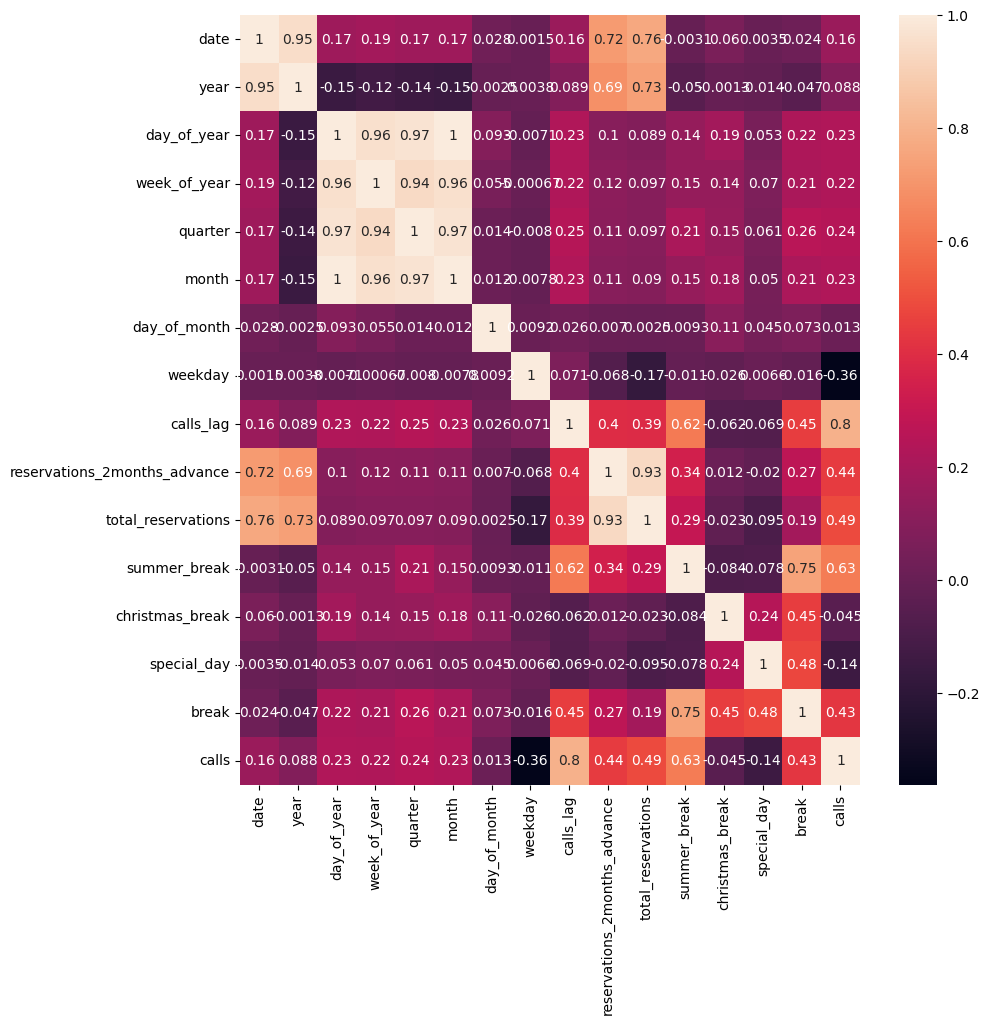

In [12]:
# plot corr for all the features
data_calls_reservations_corr = data_calls_reservations_02.corr()

plt.figure(figsize=(10,10))
sns.heatmap(data_calls_reservations_corr, annot=True)
plt.show()

cor_target = abs(data_calls_reservations_corr["calls"])

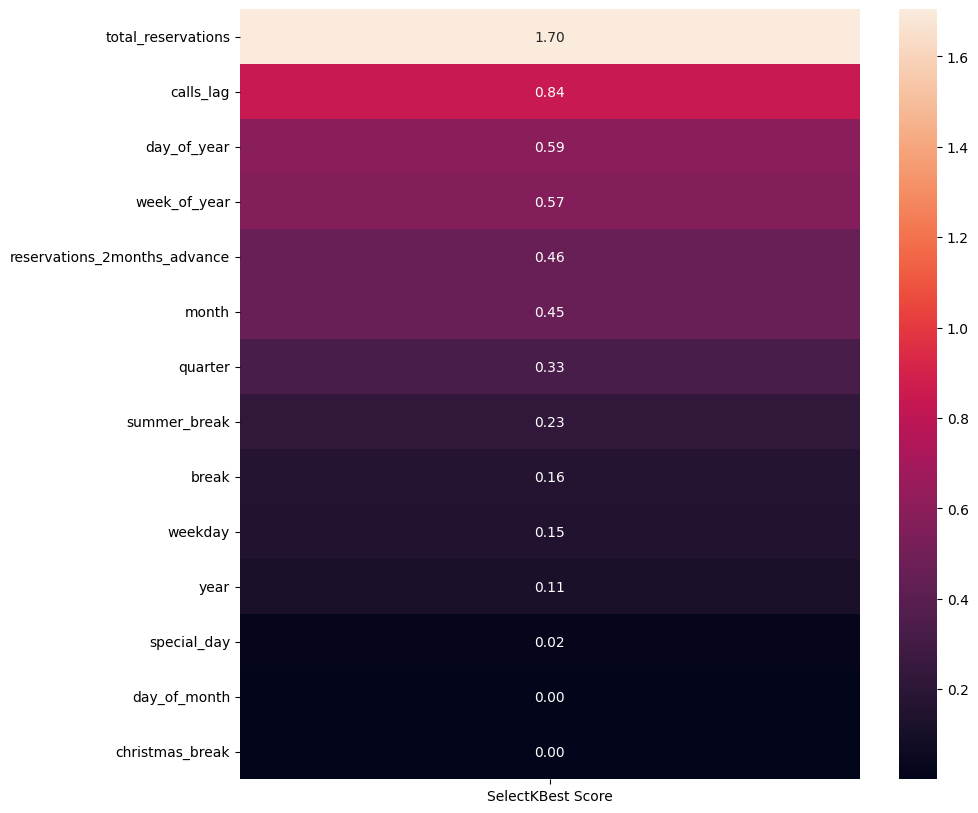

In [13]:
# feature selection: keeping in mind its for time series forecasting
# using selectkbest
from sklearn.feature_selection import SelectKBest, mutual_info_regression

feats = data_calls_reservations_02[numerical_feats[:-1]] # all except for 'calls'
target = data_calls_reservations_02[numerical_feats[-1]] # 'calls'

kbest_selector = SelectKBest(mutual_info_regression, k='all')
kbest_selected = kbest_selector.fit_transform(feats, target)

feats_scores = pd.DataFrame(data = kbest_selector.scores_, index = list(feats.columns), columns = ['SelectKBest Score'])

plt.figure(figsize=(10,10))
sns.heatmap(feats_scores.sort_values(ascending = False, by = 'SelectKBest Score'), annot = True, fmt = '.2f')
plt.show()

In [14]:
# # using randomforestregressor, using gridsearch for best params
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# model = RandomForestRegressor()

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # for cross validation
# tscv = TimeSeriesSplit(n_splits=5)
# grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=tscv)
# grid_search.fit(feats, target)

# # best params
# best_params = grid_search.best_params_
# print(f"Best Hyperparameters: {best_params}")

# best_model = grid_search.best_estimator_

In [15]:
# # fit model based on best params
# best_model = RandomForestRegressor(**best_params)
# best_model.fit(feats, target)

# feats_scores2 = pd.DataFrame(data = best_model.feature_importances_, index = list(feats.columns), columns = ['RandomForestRegressor Score'])

# plt.figure(figsize=(10,10))
# sns.heatmap(feats_scores2.sort_values(ascending = False, by = 'RandomForestRegressor Score'), annot = True, fmt = '.2f')
# plt.show()

In [14]:
# # going with kbest
# data_calls_reservations_sig_feats = data_calls_reservations_02[['date', 'year', 'day_of_year', 'week_of_year', 'quarter', 'month', 'weekday', 'calls_lag', 'summer_break', 'special_day', 'break', 'calls']]
# print(data_calls_reservations_sig_feats.info())
# data_calls_reservations_sig_feats.head()

In [15]:
# data_calls_reservations_sig_feats.to_csv(f'{PROCESSED_PATH}\data_sig_feats.csv', index=False, sep=";")

In [16]:
data_calls_reservations_all_feats = data_calls_reservations_02[['date', 'year', 'day_of_year', 'week_of_year', 'quarter', 'month', 'day_of_month', 'weekday', 'calls_lag', 'reservations_2months_advance', 'total_reservations', 'summer_break', 'christmas_break', 'special_day', 'break', 'calls']]
print(data_calls_reservations_all_feats.info())
data_calls_reservations_all_feats.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          1155 non-null   datetime64[ns]
 1   year                          1155 non-null   int32         
 2   day_of_year                   1155 non-null   int32         
 3   week_of_year                  1155 non-null   UInt32        
 4   quarter                       1155 non-null   int32         
 5   month                         1155 non-null   int32         
 6   day_of_month                  1155 non-null   int32         
 7   weekday                       1155 non-null   int64         
 8   calls_lag                     1155 non-null   float64       
 9   reservations_2months_advance  1155 non-null   float64       
 10  total_reservations            1155 non-null   float64       
 11  summer_break                  

,date,year,day_of_year,week_of_year,quarter,month,day_of_month,weekday,calls_lag,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,break,calls
0,2013-01-01,2013,1,1,1,1,1,2,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2429
1,2013-01-02,2013,2,1,1,1,2,3,2429.0,0.0,0.0,0.0,1.0,0.0,1.0,3881
2,2013-01-03,2013,3,1,1,1,3,4,3881.0,0.0,0.0,0.0,0.0,0.0,0.0,3560
3,2013-01-04,2013,4,1,1,1,4,5,3560.0,0.0,0.0,0.0,0.0,0.0,0.0,3155
4,2013-01-05,2013,5,1,1,1,5,6,3155.0,0.0,0.0,0.0,0.0,0.0,0.0,1538


In [17]:
data_calls_reservations_all_feats.to_csv(f'{PROCESSED_PATH}\data_all_feats.csv', index=False, sep=";")